<a href="https://colab.research.google.com/github/NicoEssi/Uncategorized_Code/blob/master/Biased_SAW_2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [162]:
## Import Dependencies
import pylab
import os
import math
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import random
from random import seed
from random import randint
from decimal import Decimal
from collections import Counter

## First Assignment

# Number of runs
n = 1000

# Number of steps
N = 10

# Recorded positions
rList = []

# Number of runs
rNumber = []

# Step Function

In [163]:
Steps = []
times_at_finish = 0
for ii in range(n):
  #print(ii)
  # Stored previous locations
  visited = []
  steps_taken = 0
  prev = None
  moved = False

  # Starting position
  posx = 0
  posy = 0
  #posz = 0
  visited.append([posx, posy])
  #visited.append([posx, posy, posz]) # for 3D
  x = []
  y = []
  #z = []
  x.append(posx)
  y.append(posy)
  #z.append(posz)


  # Take N steps in stochastic directions
  for jj in range(N):
    moved = False
    if jj > N-2:
      times_at_finish += 1

    while moved == False:
      value = random.randint(0,3)

      if value == 0 and prev != 1:
        if [posx+1, posy] not in visited:
          prev = 0
          posx += 1
          steps_taken += 1
          visited.append([posx,posy])
          x.append(posx)
          y.append(posy)
          #print("step: " + str(steps_taken))
          moved = True
        else:
          break
      
      elif value == 1 and prev != 0:
        if [posx-1, posy] not in visited:
          prev = 1
          posx -= 1
          steps_taken += 1
          visited.append([posx,posy])
          x.append(posx)
          y.append(posy)
          #print("step: " + str(steps_taken))
          moved = True
        else:
          break
      
      elif value == 2 and prev != 3:
        if [posx, posy+1] not in visited:
          prev = 2
          posy += 1
          steps_taken += 1
          visited.append([posx,posy])
          x.append(posx)
          y.append(posy)
          #print("step: " + str(steps_taken))
          moved = True
        else:
          break
      
      elif value == 3 and prev != 2:
        if [posx, posy-1] not in visited:
          prev = 3
          posy -= 1
          steps_taken += 1
          visited.append([posx,posy])
          x.append(posx)
          y.append(posy)
          #print("step: " + str(steps_taken))
          moved = True
        else:
          break
  
  #print(steps_taken)
  Steps.append(steps_taken)
  
      #elif value == 4 and prev != 5:
      #  prev = 4
      #  posz += 1
      #  steps_taken += 1
      #  moved = True

      #elif value == 5 and prev != 4:
      #  prev = 5
      #  posz -= 1
      #  steps_taken += 1
      #  moved = True

    #debug
    #if jj == 49:
    #  print(str(ii))


  # Squared euclidian distances
  Rval = np.sum(np.array([posx, posy]) ** 2) # add posz and posw

  # Add Rval to rList as integer
  rList.append(Rval)

  # Add number of steps in this run to appropriate list
  rNumber.append(steps_taken)

print("finished: " + str(times_at_finish))

finished: 1000


# Visualization & Calculations

Mean steps taken: 9.221
Mean rVal computed: 19.429
p-value: 1.3354890128765324


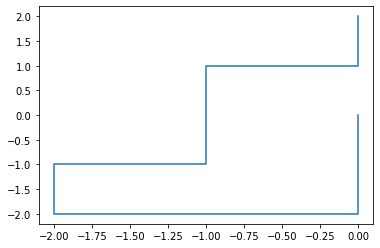

In [164]:
# Compute values
mean_n = np.mean(rNumber) # this is mean steps taken
mean_v = np.mean(rList) # this is mean Rval
p = np.log(mean_v)/np.log(mean_n) # this is p value

# Print values
print('Mean steps taken: ' + str(mean_n))
print('Mean rVal computed: ' + str(mean_v))
print('p-value: ' + str(p))

# Visualize steps
fig = plt.figure()
plt.plot(x, y)
plt.show()

In [165]:
# Compute entropy
c = Counter(Steps)
print("This is c(N) " + str(c[N]))
w = c[N]/float(n)
print("This is W " + str(w))
d = 2 # change to dimensions

omg = w*((2*d)-1)**(N-2)
s = np.log(omg)/float(N-2)
print('s = ' + str(s))

This is c(N) 549
This is W 0.549
s = 1.023655183984034


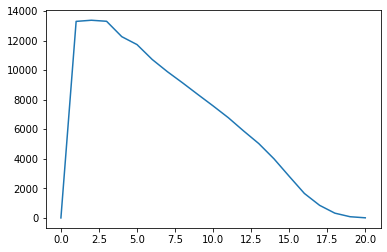

In [ ]:
c = Counter(Steps) # count how many times different steps have been taken

# Compute and visualize distribution
xa = []
ya = []
for i in range(N+1):
  xa.append(i)
  ya.append(c[i])

fig = plt.figure()
plt.plot(xa, ya)
plt.show()